In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Завантажимо стоп-слова
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vdubyna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vdubyna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/vdubyna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('./SpamEmailClassificationDataset/combined_data.csv', skiprows=1)
df

label                                               text
0          1  ounce feather bowl hummingbird opec moment ala...
1          1  wulvob get your medircations online qnb ikud v...
2          0   computer connection from cnn com wednesday es...
3          1  university degree obtain a prosperous future m...
4          0  thanks for all your answers guys i know i shou...
...      ...                                                ...
14855      1  gives error email friend add favourites archic...
14856      1  t o d a\ny ' s\nspecial\nvisit : http : / www ...
14857      1  hey bro nice talking to you the other day http...
14858      0   converted text html to text plain doctors wit...
14859      1  you're in debt don't worry so is everyone else...

[14860 rows x 2 columns]

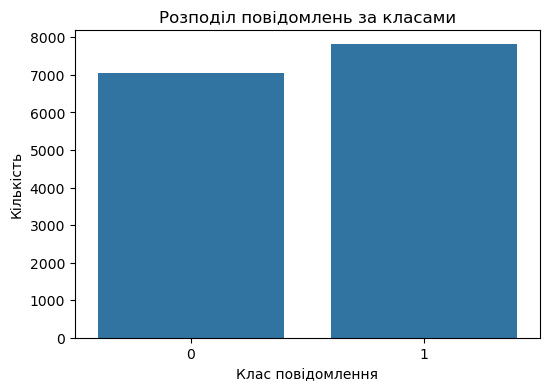

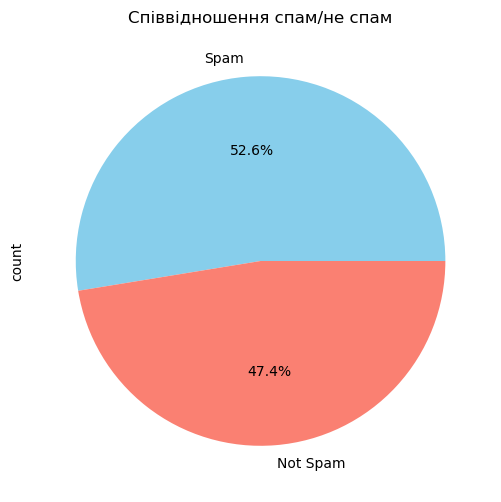

In [3]:
label_column = "label"

# Візуалізація розподілу класів у вигляді гістограми
plt.figure(figsize=(6, 4))
sns.countplot(x=df[label_column])
plt.xlabel("Клас повідомлення")
plt.ylabel("Кількість")
plt.title("Розподіл повідомлень за класами")
plt.show()

# Візуалізація розподілу класів у вигляді Pie Chart
plt.figure(figsize=(6, 6))
df[label_column].value_counts().plot.pie(autopct="%1.1f%%", labels=["Spam", "Not Spam"], colors=["skyblue", "salmon"])
plt.title("Співвідношення спам/не спам")
plt.show()

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Завантаження необхідних ресурсів NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Ініціалізація лематизатора та списку стоп-слів
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Обробка текстів
corpus = []
for document in df["text"]:
    # Залишаємо тільки літери та переводимо текст у нижній регістр
    document = re.sub(r"[^a-zA-Z]", " ", document).lower()
    # Токенізація (розбиття на слова)
    document = document.split()
    # Лематизація та видалення стоп-слів
    document = [lemmatizer.lemmatize(word) for word in document if word not in stop_words]
    # Видалення повторюваних слів у повідомленні
    document = list(set(document))
    # Об'єднання оброблених слів у текст назад
    document = " ".join(document)
    corpus.append(document)

# Оновлення обробленого тексту в DataFrame
df["text"] = corpus
df

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vdubyna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vdubyna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/vdubyna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


label                                               text
0          1  afterimage bread dyad valkyrie quell alabaster...
1          1  medircations meridia xannax much intrested ult...
2          0  audience toy warner com generation old fashion...
3          1  prosperous future earning week power book exam...
4          0  alias tmp var include delay log escapelong sam...
...      ...                                                ...
14855      1  ok bad group fix guaranteed ought regular forg...
14856      1  message com hewlett room send paste toshiba in...
14857      1  day oeqnzp sehxual law discussfruit rejuvenate...
14858      0  compulsory decins practice disease converted t...
14859      1  escapenumberlp via com care debtmagician attn ...

[14860 rows x 2 columns]

In [5]:
# Розділяємо вибірку на спам і не-спам
spam_messages = df[df["label"] == 1]["text"].tolist()
ham_messages = df[df["label"] == 0]["text"].tolist()
print(len(spam_messages), len(ham_messages))

7813 7047


In [18]:
# Визначаємо розмір навчальної вибірки
train_size = 1000  # Можна змінити за потребою // 3000

# Формуємо навчальні вибірки
train_spam = spam_messages[:train_size]
train_ham = ham_messages[:train_size]

In [19]:
test_spam_emails = spam_messages[train_size:train_size + 5] 
test_ham_emails = ham_messages[train_size:train_size + 5]

In [20]:
from collections import Counter

# Створюємо словники частоти слів у спам і не-спам повідомленнях
spam_words = Counter(" ".join(train_spam).split())
ham_words = Counter(" ".join(train_ham).split())

vocab_unique_words_spam = list(set(spam_words))
vocab_unique_words_ham = list(set(ham_words))

# Фільтрація: залишаємо тільки слова довші за 3 символи, які не містять "escape"
vocab_unique_words_spam = [
    word for word in set(spam_words) if len(word) > 3 and "escape" not in word
]
vocab_unique_words_ham = [
    word for word in set(ham_words) if len(word) > 3 and "escape" not in word
]

print(vocab_unique_words_spam[:5])
print(vocab_unique_words_ham[:5])

print(len(vocab_unique_words_spam), len(vocab_unique_words_ham))


['laid', 'dusty', 'fatuous', 'cyclotomic', 'zone']
['laid', 'chron', 'almatir', 'zone', 'ergy']
18748 18044


In [21]:
dict_spamicity = {}
for w in vocab_unique_words_spam:
    emails_with_w = 0     # counter
    for sentence in train_spam:
        if w in sentence:
            emails_with_w+=1

    print(f"Number of spam emails with the word '{w}': {emails_with_w}")
    total_spam = len(train_spam)
    spamicity = (emails_with_w+1)/(total_spam+2)
    print(f"Spamicity of the word '{w}': {spamicity} ")
    dict_spamicity[w.lower()] = spamicity

Number of spam emails with the word 'laid': 3
Spamicity of the word 'laid': 0.003992015968063872 
Number of spam emails with the word 'dusty': 2
Spamicity of the word 'dusty': 0.0029940119760479044 
Number of spam emails with the word 'fatuous': 1
Spamicity of the word 'fatuous': 0.001996007984031936 
Number of spam emails with the word 'cyclotomic': 1
Spamicity of the word 'cyclotomic': 0.001996007984031936 
Number of spam emails with the word 'zone': 15
Spamicity of the word 'zone': 0.015968063872255488 
Number of spam emails with the word 'opposes': 1
Spamicity of the word 'opposes': 0.001996007984031936 
Number of spam emails with the word 'sideeffects': 1
Spamicity of the word 'sideeffects': 0.001996007984031936 
Number of spam emails with the word 'baune': 1
Spamicity of the word 'baune': 0.001996007984031936 
Number of spam emails with the word 'johnnorman': 1
Spamicity of the word 'johnnorman': 0.001996007984031936 
Number of spam emails with the word 'fancy': 13
Spamicity of t

In [22]:
dict_hamicity = {}
for w in vocab_unique_words_ham:
    emails_with_w = 0     # counter
    for sentence in train_ham:
        if w in sentence:
            emails_with_w+=1

    print(f"Number of ham emails with the word '{w}': {emails_with_w}")
    total_ham = len(train_ham)
    hamicity = (emails_with_w+1)/(total_ham+2)       # Smoothing applied
    print(f"Hamicity of the word '{w}': {hamicity} ")
    dict_hamicity[w.lower()] = hamicity
    

Number of ham emails with the word 'laid': 3
Hamicity of the word 'laid': 0.003992015968063872 
Number of ham emails with the word 'chron': 11
Hamicity of the word 'chron': 0.011976047904191617 
Number of ham emails with the word 'almatir': 1
Hamicity of the word 'almatir': 0.001996007984031936 
Number of ham emails with the word 'zone': 4
Hamicity of the word 'zone': 0.00499001996007984 
Number of ham emails with the word 'ergy': 67
Hamicity of the word 'ergy': 0.06786427145708583 
Number of ham emails with the word 'opposes': 3
Hamicity of the word 'opposes': 0.003992015968063872 
Number of ham emails with the word 'bowes': 1
Hamicity of the word 'bowes': 0.001996007984031936 
Number of ham emails with the word 'chronicling': 1
Hamicity of the word 'chronicling': 0.001996007984031936 
Number of ham emails with the word 'elder': 3
Hamicity of the word 'elder': 0.003992015968063872 
Number of ham emails with the word 'zeitz': 1
Hamicity of the word 'zeitz': 0.001996007984031936 
Number

In [23]:
prob_ham = len(train_ham) / (len(train_spam)+(len(train_ham)))
print(prob_ham)
prob_spam = len(train_spam) / (len(train_spam)+(len(train_ham)))
print(prob_spam)

0.5
0.5


In [25]:
def mult(list_) :        # function to multiply all word probs together
    total_prob = 1
    for i in list_:
        total_prob += total_prob * i
    return total_prob

def Bayes(email):
    probs_s = []
    probs_h = []
    for word in email:
        Pr_S = prob_spam
        # print('prob of spam in general ',Pr_S)
        try:
            pr_WS = dict_spamicity[word]
            # print(f'prob "{word}"  is a spam word : {pr_WS}')
        except KeyError:
            pr_WS = 1/(total_spam+2)  # Apply smoothing for word not seen in spam training data, but seen in ham training
            # print(f"prob '{word}' is a spam word: {pr_WS}")

        Pr_H = prob_ham
        # print('prob of ham in general ', Pr_H)
        try:
            pr_WH = dict_hamicity[word]
            # print(f'prob "{word}" is a ham word: ',pr_WH)
        except KeyError:
            pr_WH = (1/(total_ham+2))  # Apply smoothing for word not seen in ham training data, but seen in spam training
            # print(f"WH for {word} is {pr_WH}")
            # print(f"prob '{word}' is a ham word: {pr_WH}")

        prob_word_is_spam_BAYES = pr_WS
        prob_word_is_ham_BAYES = pr_WH

        # print('###########################')
        probs_s.append(prob_word_is_spam_BAYES)
        probs_h.append(prob_word_is_ham_BAYES)
    final_classification = Pr_S*mult(probs_s) / ((Pr_S*mult(probs_s))+(Pr_H*mult(probs_h)))
    print('###########################')
    if final_classification >= 0.5:
        print(f'email is SPAM: with spammy confidence of {final_classification*100}%')
    else:
        print(f'email is HAM: with spammy confidence of {final_classification*100}%')
    return final_classification

reduced_sentences_spam_test = []
for sentence in test_spam_emails:
    words_ = []
    for word in sentence.split():
        if word in vocab_unique_words_spam:
            # print(f"'{word}', ok")
            words_.append(word)
        elif word in vocab_unique_words_ham:
            # print(f"'{word}', ok")
            words_.append(word)
        # else:
            # print(f"'{word}', word not present in labelled spam training data")
    reduced_sentences_spam_test.append(words_)

reduced_sentences_ham_test = []                   # repeat for ham words
for sentence in test_ham_emails:
    words_ = []
    for word in sentence.split():
        if word in vocab_unique_words_ham:
            # print(f"'{word}', ok")
            words_.append(word)
        elif word in vocab_unique_words_spam:
            # print(f"'{word}', ok")
            words_.append(word)
        # else:
            # print(f"'{word}', word not present in labelled ham training data")
    reduced_sentences_ham_test.append(words_)

# Тестування спам-повідомлень
print("\nTesting SPAM emails:")
for email in reduced_sentences_spam_test:  # Перевіримо перші 5 тестових повідомлень
    print("\n---------------------------------")
    print("\n Spam message ---")
    # print(f"Message: {email}")
    Bayes(email)

# Тестування не-спам повідомлень
print("\nTesting HAM emails:")
for email in reduced_sentences_ham_test:  # Перевіримо ще 5 тестових повідомлень
    print("\n---------------------------------")
    print("\n Ham message ---")
    # print(f"Message: {email}")
    Bayes(email)



Testing SPAM emails:

---------------------------------

 Spam message ---
###########################
email is SPAM: with spammy confidence of 66.10441088663256%

---------------------------------

 Spam message ---
###########################
email is SPAM: with spammy confidence of 62.87554294000821%

---------------------------------

 Spam message ---
###########################
email is SPAM: with spammy confidence of 66.14307853530511%

---------------------------------

 Spam message ---
###########################
email is HAM: with spammy confidence of 28.516470928393627%

---------------------------------

 Spam message ---
###########################
email is SPAM: with spammy confidence of 56.3149295214984%

Testing HAM emails:

---------------------------------

 Ham message ---
###########################
email is HAM: with spammy confidence of 26.695244537253558%

---------------------------------

 Ham message ---
###########################
email is HAM: with spammy 

In [30]:
# Відсортовуємо словник за значенням ймовірності у спадаючому порядку
top_spam_words = sorted(dict_spamicity.items(), key=lambda x: x[1], reverse=True)[:10]

# Виводимо топ-10 слів з найвищою ймовірністю спаму
print("Топ-10 спамних слів:")
for word, prob in top_spam_words:
    print(f"{word}: {prob:.6f}")

Топ-10 спамних слів:
tion: 0.642715
number: 0.555888
cape: 0.527944
ation: 0.456088
ment: 0.399202
http: 0.386228
able: 0.333333
ight: 0.330339
ever: 0.297405
cont: 0.292415


### Висновок щодо якості класифікатора  
1.	Коректна класифікація більшості тестових повідомлень:
- Класифікатор правильно визначає більшість HAM (не-спам) повідомлень (усі мають низьку ймовірність спаму, < 30%).
- Більшість SPAM повідомлень класифікуються правильно з ймовірністю спаму понад 50%.
2.	Один випадок помилкової класифікації:
- Одне SPAM повідомлення було помилково визначене як HAM (28.52% ймовірності спаму).
3.	Рівень впевненості у класифікації:
- Спам-повідомлення мають відносно середню впевненість (56-66% ймовірності спаму).
- Не-спам повідомлення мають низьку ймовірність спаму (0.84% - 26.69%), що є гарним показником.